###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

### Plotting two normal distributions
Lets assume we have a feature that for two classes behaves as shown below by the normal distributions

In [1]:
import numpy as np

In [2]:
pts = 200
limit = (-5,5)
x = np.linspace(limit[0],limit[1],pts)

In [3]:
from scipy.stats import norm

In [4]:
negative = norm(-0.5, 1)
type(negative)

scipy.stats._distn_infrastructure.rv_frozen

In [5]:
positive = norm(0.5, 1)
type(positive)

scipy.stats._distn_infrastructure.rv_frozen

In [6]:
priors = (.5, .5)

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'density x prior')

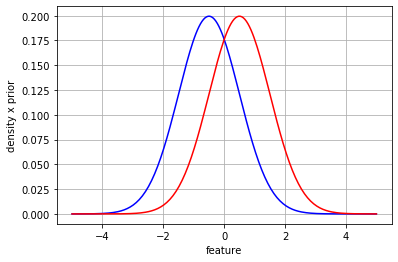

In [8]:
y_negative = negative.pdf(x) * priors[0]
y_positive = positive.pdf(x) * priors[1]
plt.plot(x,y_negative,'-b')
plt.plot(x,y_positive,'-r')
plt.grid()
plt.xlabel('feature')
plt.ylabel('density x prior')

### Representing probability of error
The code shown below highlights the areas we must use to compute the probability of error. Here the location of the boundary (in purple) is manually selected using the variable `boundary`. Change this variable and observe the effect.

Text(0, 0.5, 'density x prior')

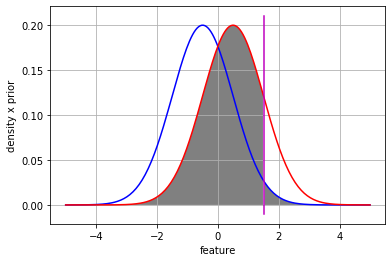

In [9]:
y_negative = negative.pdf(x) * priors[0]
y_positive = positive.pdf(x) * priors[1]
plt.plot(x,y_negative,'-b')
plt.plot(x,y_positive,'-r')
boundary = 1.5
plt.plot([boundary, boundary],plt.ylim(),'-m')
error = (x > boundary)
plt.fill_between(x, y_negative, where=error, facecolor='grey')
error = (x < boundary)
plt.fill_between(x, y_positive, where=error, facecolor='grey')
plt.xlabel('feature')
plt.ylabel('density x prior')
plt.grid()
plt.xlabel('feature')
plt.ylabel('density x prior')

### Estimating probability of error
The code shown below computes the probability of error by estimating the area highlighted. In other words, the area under the curves of the functions in the highlighted regions. Here the boundary (in purple) is determined so as to minimize the probability of error. Change the prior probabilities or the density functions defined few cells above (variables `priors`, `positive`, `negative`) and observe the effect.

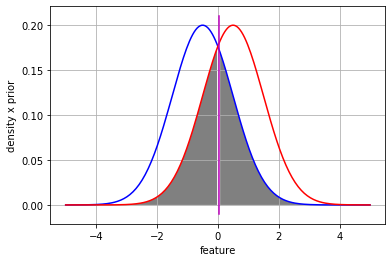

In [10]:
k = np.nonzero((y_negative > y_positive).astype(int) == 0)[0][0]
plt.plot(x,y_negative,'-b')
plt.plot(x,y_positive,'-r')
boundary = x[k]
plt.plot([boundary, boundary],plt.ylim(),'-m')
error = (x > boundary)
plt.fill_between(x, y_negative, where=error, facecolor='grey')
error = (x < boundary)
plt.fill_between(x, y_positive, where=error, facecolor='grey')
plt.xlabel('feature')
plt.ylabel('density x prior')
plt.grid()

In [11]:
perror = 0
dt = (limit[1] - limit[0])/pts
f = y_negative[x > boundary]
t = [i*dt for i in range(0,len(f))]
perror += np.trapz(f,t)
f = y_positive[x < boundary]
t = [i*dt for i in range(0,len(f))]
perror += np.trapz(f,t)
perror

0.28971686598294555

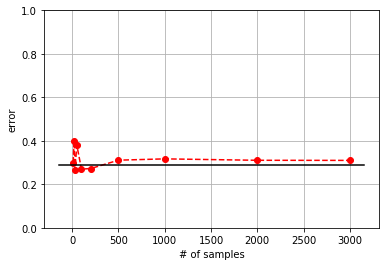

In [12]:
amount = [10, 20, 30, 50, 100, 200, 500, 1000, 2000, 3000];
error = np.zeros(len(amount));
for k in range(len(amount)):
    obs = negative.rvs(int(2*amount[k]*priors[0]))
    error[k] += (obs > boundary).sum()                  
    obs = positive.rvs(int(2*amount[k]*priors[1]))       
    error[k] += (obs < boundary).sum();          
    error[k] = error[k] / (2 * amount[k]);
plt.plot(amount,error,'--or')
plt.plot(plt.xlim(),[perror]*2,'-k')
plt.ylim([0,1])
plt.xlabel('# of samples');
plt.ylabel('error');
plt.grid()

### More about boundary
Using multivariate gaussian distributions. Boundary in purple.

In [13]:
from scipy.stats import multivariate_normal

In [14]:
points = 100
priors = [0.8, 0.2]
mu0 = [-2, -2]
sigma0 = [[2, 0.2], [0.2, 2]]
mu1 = [2, 1]
sigma1 = [[1, 0.1], [0.1, 1]]
limit = [-5, 5]
x1 = np.linspace(limit[0],limit[1],points)
x2 = np.linspace(limit[0],limit[1],points)
[x1,x2] = np.meshgrid(x1,x2)
p0 = multivariate_normal(mean=mu0,cov=sigma0)
p1 = multivariate_normal(mean=mu1,cov=sigma1)

In [15]:
g0 = p0.pdf(np.vstack((x1.flatten(), x2.flatten())).T) * priors[0]
g1 = p1.pdf(np.vstack((x1.flatten(), x2.flatten())).T) * priors[1]

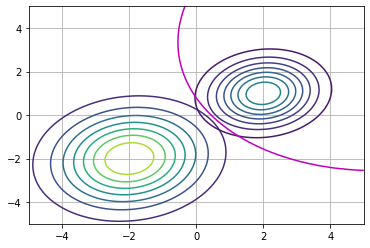

In [16]:
maximum = np.vstack((g0,g1)).max()
cl0 = plt.contour(x1,x2,g0.reshape(points,points),vmin=0,vmax=maximum)
cl1 = plt.contour(x1,x2,g1.reshape(points,points),vmin=0,vmax=maximum)
g = g0 - g1
plt.contour(x1,x2,g.reshape(points,points),levels=[0],colors='m')
plt.grid()